In [1]:
# 景気循環期の日経平均株価の年間変化率の算出
states=['recover','growth','stable','bubble','reform','now']
dates=['1949/5/16','1954/12/1','1972/1/1','1986/12/1','1993/11/1','2016/9/30']
print(states)

['recover', 'growth', 'stable', 'bubble', 'reform', 'now']


In [2]:
print(dates)

['1949/5/16', '1954/12/1', '1972/1/1', '1986/12/1', '1993/11/1', '2016/9/30']


In [3]:
import pandas_datareader.data as pdr
import numpy as np
end='2016/9/30'
n225 = pdr.DataReader("NIKKEI225",'fred',"1949/5/16",end).NIKKEI225
print('rate of change')
for i in range(len(dates)-1):
    ave=n225[dates[i]:dates[i+1]].pct_change().mean()*250
    print(states[i],': %2.2f ％;'%(ave*100))
print
print('volatility')
for i in range(len(dates)-1):
    vol=np.log(n225[dates[i]:dates[i+1]]).diff().std()*np.sqrt(250)
    print(states[i],': %2.2f ％;'%(vol*100))

rate of change
recover : 13.18 ％;
growth : 12.91 ％;
stable : 13.06 ％;
bubble : 3.30 ％;
reform : 2.03 ％;
volatility
recover : 22.99 ％;
growth : 14.45 ％;
stable : 12.64 ％;
bubble : 22.82 ％;
reform : 23.54 ％;


In [4]:
# グラフを用いた長期トレンドの把握
struct_break=[('1949/5/16','recv'),('1954/12/1','growth'),('1972/1/1','stable'),('1986/12/1','bubble'),('1991/3/1','reform')]

Text(0.5,1,'NIKKEI 225 and structual change')

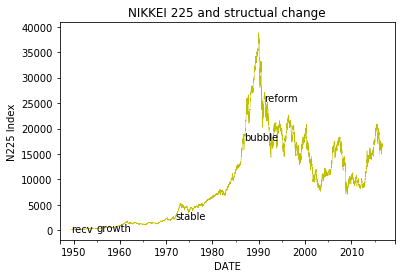

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
fig=plt.figure()
g=fig.add_subplot(1,1,1)
n225.plot(ax=g,style='y-',linewidth=0.5)
plt.ylabel('N225 Index')
for date, label in struct_break:
    g.annotate(label,xy=(date,n225.asof(date)+1000),
    xytext=(date,n225.asof(date)+1000),
    horizontalalignment='left',verticalalignment='top')
    g.set_xlim(['1947/1/1','2019/4/25'])
    
plt.title("NIKKEI 225 and structual change")

Text(0.5,1,'Log Nikkei 225 index and structual change')

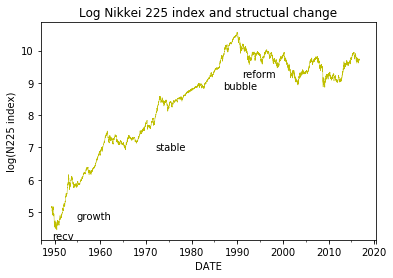

In [6]:
# 対数価格表示
import numpy as np
fig=plt.figure()
g=fig.add_subplot(1,1,1)
ln_n225=np.log(n225)
ln_n225.plot(ax=g,style='y-',linewidth=0.5)

for date, label in struct_break:
    g.annotate(label,xy=(date, ln_n225.asof(date)),
              xytext=(date,ln_n225.asof(date)-0.75),
              horizontalalignment='left',verticalalignment='top')
    g.set_xlim(['1947/1/1','2020/4/25'])
plt.ylabel('log(N225 index)')
plt.title("Log Nikkei 225 index and structual change")

In [7]:
import pandas_datareader.data as pdr
import numpy as np
for i in range(len(dates)-1):
    vol=np.log(n225[dates[i]:dates[i+1]]).diff().std()
    print(states[i],': %2.4f ;' %vol,)

recover : 0.0145 ;
growth : 0.0091 ;
stable : 0.0080 ;
bubble : 0.0144 ;
reform : 0.0149 ;


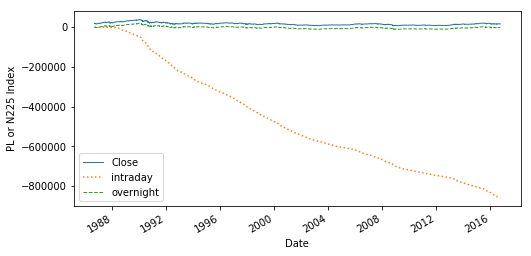

In [8]:
# 日中のリターンとオーバーナイトのリターン
plt.figure(figsize=(8,4))
analysis=pdr.DataReader("^N225",'yahoo',"1986/9/3",end)
analysis['intraday']=0
analysis['overnight']=0
c0=analysis.Close.iloc[0]
for i in range(1,len(analysis)):
    o=analysis.iloc[i,0]
    c=analysis.iloc[i,3]
    analysis.iloc[i,6]=c-o
    analysis.iloc[i,7]=c-c0
    c0=c
analysis.Close.plot(label='Close',linewidth=1)
analysis.intraday.cumsum().plot(label="intraday",linestyle=":")
analysis.overnight.cumsum().plot(label="overnight",linestyle="--",linewidth=1)
plt.legend()
plt.ylabel('PL or N225 Index')
plt.legend(loc='lower left')

Text(0,0.5,'PL or Index')

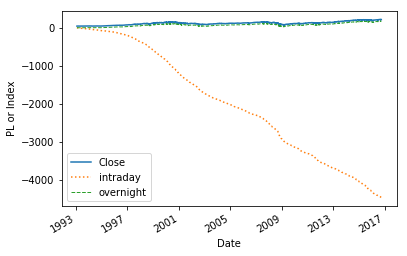

In [9]:
analysis=pdr.DataReader("SPY",'yahoo',"1983/1/29",end)
analysis['intraday']=0
analysis['overnight']=0
c0=analysis.Close.iloc[0]
for i in range(1,len(analysis)):
    o=analysis.iloc[i,0]
    c=analysis.iloc[i,3]
    analysis.iloc[i,6]=c-o
    analysis.iloc[i,7]=c-c0
    c0=c
analysis.Close.plot(label='Close')
analysis.intraday.cumsum().plot(label="intraday",linestyle=":")
analysis.overnight.cumsum().plot(label="overnight",linestyle="--",linewidth=1)
plt.legend()
plt.ylabel('PL or Index')

Text(0,0.5,'PL or Index')

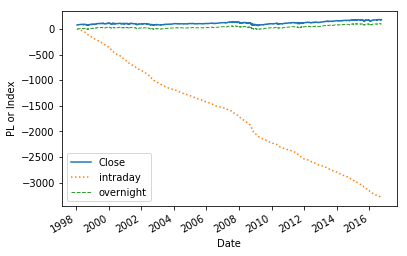

In [10]:
analysis=pdr.DataReader("DIA",'yahoo',"1983/1/29",end)
analysis['intraday']=0
analysis['overnight']=0
c0=analysis.Close.iloc[0]
for i in range(1,len(analysis)):
    o=analysis.iloc[i,0]
    c=analysis.iloc[i,3]
    analysis.iloc[i,6]=c-o
    analysis.iloc[i,7]=c-c0
    c0=c
analysis.Close.plot(label='Close')
analysis.intraday.cumsum().plot(label="intraday",linestyle=":")
analysis.overnight.cumsum().plot(label="overnight",linestyle="--",linewidth=1)
plt.legend()
plt.ylabel('PL or Index')

Text(0,0.5,'PL or Index')

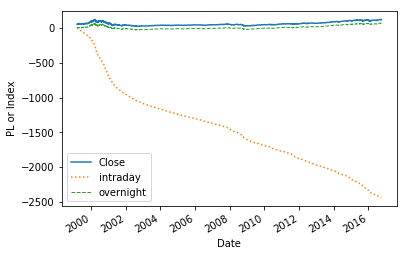

In [11]:
analysis=pdr.DataReader("QQQ",'yahoo',"1983/1/29",end)
analysis['intraday']=0
analysis['overnight']=0
c0=analysis.Close.iloc[0]
for i in range(1,len(analysis)):
    o=analysis.iloc[i,0]
    c=analysis.iloc[i,3]
    analysis.iloc[i,6]=c-o
    analysis.iloc[i,7]=c-c0
    c0=c
analysis.Close.plot(label='Close')
analysis.intraday.cumsum().plot(label="intraday",linestyle=":")
analysis.overnight.cumsum().plot(label="overnight",linestyle="--",linewidth=1)
plt.legend()
plt.ylabel('PL or Index')